1. - Recopilación de tweets.

Debido a que tuve muchos problemas ya que no terminaba de hacer funcionar la API y hacer scrapping es ahora gracias al bueno de Elon bastante complicado. Me fije en el Endpoint subido por el propio Elon...

In [50]:
import requests
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
timestamp = datetime.datetime.now().strftime('%Y-%m-%d%H:%M:%S')
params = {'ts': timestamp};
url = "http://twitterdata-env-1.eba-znn3kr4u.us-east-2.elasticbeanstalk.com/get_data?year=2022"
res = requests.get(url,params=params)
res

<Response [200]>

In [3]:
json_2022 = res.json()

In [4]:
timestamp = datetime.datetime.now().strftime('%Y-%m-%d%H:%M:%S')
params = {'ts': timestamp, 
        'limit': 100};
url = "http://twitterdata-env-1.eba-znn3kr4u.us-east-2.elasticbeanstalk.com/get_data?year=2023"
res = requests.get(url,params=params)
res

<Response [200]>

In [5]:
json_2023 = res.json()

Hacemos dos dataframes de cada año y posteriormente los concatenamos

In [7]:
data_list_2022 = json_2022['data']
data_list_2023 = json_2023['data']
df_2022 = pd.DataFrame(data_list_2022)
df_2023 = pd.DataFrame(data_list_2023)

In [8]:
df_2022

,author_id,created_at,edit_history_tweet_ids,id,public_metrics,text
0,1151510939105144834,2022-12-29T16:39:19.000Z,[1608502937332113408],1608502937332113408,"{'impression_count': 113, 'like_count': 4, 'qu...",Empieza el año formándote en una de las profes...
1,570795448,2022-12-29T12:52:11.000Z,[1608445776732246017],1608445776732246017,"{'impression_count': 124, 'like_count': 2, 'qu...",Los 4 bootcamps tecnológicos de EDEM y @TheBri...
2,1128860148,2022-12-29T09:16:11.000Z,[1608391421014196224],1608391421014196224,"{'impression_count': 49, 'like_count': 2, 'quo...",@EDEMempresarios acoge el 12 de enero un Open ...
3,570795448,2022-12-27T09:00:57.000Z,[1607662809575292929],1607662809575292929,"{'impression_count': 218, 'like_count': 5, 'qu...",Si estás buscando una profesión que te cambie ...
4,1162694149956603904,2022-12-23T12:54:06.000Z,[1606271930763354112],1606271930763354112,"{'impression_count': 120, 'like_count': 1, 'qu...",En @TheBridge_Tech tenemos un deseo para ti💫\n...
5,799935450844631040,2022-12-22T23:51:18.000Z,[1606074933033009152],1606074933033009152,"{'impression_count': 108, 'like_count': 3, 'qu...",. @EDEMempresarios y @TheBridge_Tech se alían...
6,921670812637257728,2022-12-22T09:59:38.000Z,[1605865639213670400],1605865639213670400,"{'impression_count': 142, 'like_count': 2, 'qu...",📚 Formación\n\n@EDEMempresarios y la acelerado...
7,1162694149956603904,2022-12-22T08:55:25.000Z,[1605849476895162368],1605849476895162368,"{'impression_count': 308, 'like_count': 4, 'qu...",¡Ven al próximo #OpenDayValencia y conoce los ...
8,1175646685,2022-12-21T13:15:56.000Z,[1605552650119847938],1605552650119847938,"{'impression_count': 321, 'like_count': 7, 'qu...",EDEM y The Bridge se alían para impartir bootc...
9,402013017,2022-12-21T12:30:01.000Z,[1605541094397198336],1605541094397198336,"{'impression_count': 538, 'like_count': 5, 'qu...",💻 @EDEMempresarios y @TheBridge_Tech se alían ...


In [9]:
df_2023

,author_id,created_at,edit_history_tweet_ids,id,public_metrics,text
0,936539844079218688,2023-03-07T17:16:14.000Z,[1633154604018876416],1633154604018876416,"{'impression_count': 357, 'like_count': 8, 'qu...",¡Hola #dataholics! La primavera trompetera se ...
1,1585726199485140993,2023-03-06T10:38:30.000Z,[1632692123412594688],1632692123412594688,"{'impression_count': 31, 'like_count': 0, 'quo...",Las inscripciones se realizarán por Eventbrite...
2,1585726199485140993,2023-03-06T10:38:30.000Z,[1632692120719859712],1632692120719859712,"{'impression_count': 950, 'like_count': 5, 'qu...",¡Por fin podemos publicar el cartel con los po...
3,41545659,2023-03-06T08:48:56.000Z,[1632664546665025536],1632664546665025536,"{'impression_count': 90, 'like_count': 3, 'quo...","Encuentro de la @mlopscommunity en Madrid: ""ML..."
4,925597948410580993,2023-03-04T22:32:56.000Z,[1632147141224275970],1632147141224275970,"{'impression_count': 35, 'like_count': 1, 'quo...",@nodosenlared @snowded @TheBridge_Tech Muy bue...
...,...,...,...,...,...,...
84,271028835,2023-01-07T19:55:52.000Z,[1611813891322908672],1611813891322908672,"{'impression_count': 166, 'like_count': 7, 'qu...",🚀 @EDEMempresarios y @TheBridge_Tech se alía...
85,1530194743786881024,2023-01-06T12:28:27.000Z,[1611338908196913153],1611338908196913153,"{'impression_count': 51, 'like_count': 2, 'quo...",Gracias a nuestros amigos @TheBridge_Tech por ...
86,10279282,2023-01-04T15:02:11.000Z,[1610652818234347521],1610652818234347521,"{'impression_count': 82, 'like_count': 3, 'quo...",¿Te interesa el diseño de #producto digital? V...
87,2402179123,2023-01-04T11:57:41.000Z,[1610606391445815297],1610606391445815297,"{'impression_count': 116, 'like_count': 3, 'qu...",¡Empezamos el año con una #masterclass de #uxu...


In [10]:
df_2022.public_metrics.head()

0    {'impression_count': 113, 'like_count': 4, 'qu...
1    {'impression_count': 124, 'like_count': 2, 'qu...
2    {'impression_count': 49, 'like_count': 2, 'quo...
3    {'impression_count': 218, 'like_count': 5, 'qu...
4    {'impression_count': 120, 'like_count': 1, 'qu...
Name: public_metrics, dtype: object

Esta columna esta como diccionario asique sacamos la información de ahí.


In [11]:
df_norm_2022 = pd.json_normalize(df_2022['public_metrics'])
df_norm_2023 = pd.json_normalize(df_2023['public_metrics'])
df_2022 = result_df = pd.concat([df_2022, df_norm_2022], axis=1)
df_2023 = result_df = pd.concat([df_2023, df_norm_2023], axis=1)

In [12]:
df_2022.head()

,author_id,created_at,edit_history_tweet_ids,id,public_metrics,text,impression_count,like_count,quote_count,reply_count,retweet_count
0,1151510939105144834,2022-12-29T16:39:19.000Z,[1608502937332113408],1608502937332113408,"{'impression_count': 113, 'like_count': 4, 'qu...",Empieza el año formándote en una de las profes...,113,4,0,0,1
1,570795448,2022-12-29T12:52:11.000Z,[1608445776732246017],1608445776732246017,"{'impression_count': 124, 'like_count': 2, 'qu...",Los 4 bootcamps tecnológicos de EDEM y @TheBri...,124,2,0,0,0
2,1128860148,2022-12-29T09:16:11.000Z,[1608391421014196224],1608391421014196224,"{'impression_count': 49, 'like_count': 2, 'quo...",@EDEMempresarios acoge el 12 de enero un Open ...,49,2,0,0,0
3,570795448,2022-12-27T09:00:57.000Z,[1607662809575292929],1607662809575292929,"{'impression_count': 218, 'like_count': 5, 'qu...",Si estás buscando una profesión que te cambie ...,218,5,0,0,0
4,1162694149956603904,2022-12-23T12:54:06.000Z,[1606271930763354112],1606271930763354112,"{'impression_count': 120, 'like_count': 1, 'qu...",En @TheBridge_Tech tenemos un deseo para ti💫\n...,120,1,0,0,1


Ahora concatenamos los dos df

In [13]:
df_unido = pd.concat([df_2022, df_2023])

In [14]:
df_unido

,author_id,created_at,edit_history_tweet_ids,id,public_metrics,text,impression_count,like_count,quote_count,reply_count,retweet_count
0,1151510939105144834,2022-12-29T16:39:19.000Z,[1608502937332113408],1608502937332113408,"{'impression_count': 113, 'like_count': 4, 'qu...",Empieza el año formándote en una de las profes...,113,4,0,0,1
1,570795448,2022-12-29T12:52:11.000Z,[1608445776732246017],1608445776732246017,"{'impression_count': 124, 'like_count': 2, 'qu...",Los 4 bootcamps tecnológicos de EDEM y @TheBri...,124,2,0,0,0
2,1128860148,2022-12-29T09:16:11.000Z,[1608391421014196224],1608391421014196224,"{'impression_count': 49, 'like_count': 2, 'quo...",@EDEMempresarios acoge el 12 de enero un Open ...,49,2,0,0,0
3,570795448,2022-12-27T09:00:57.000Z,[1607662809575292929],1607662809575292929,"{'impression_count': 218, 'like_count': 5, 'qu...",Si estás buscando una profesión que te cambie ...,218,5,0,0,0
4,1162694149956603904,2022-12-23T12:54:06.000Z,[1606271930763354112],1606271930763354112,"{'impression_count': 120, 'like_count': 1, 'qu...",En @TheBridge_Tech tenemos un deseo para ti💫\n...,120,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
84,271028835,2023-01-07T19:55:52.000Z,[1611813891322908672],1611813891322908672,"{'impression_count': 166, 'like_count': 7, 'qu...",🚀 @EDEMempresarios y @TheBridge_Tech se alía...,166,7,0,0,2
85,1530194743786881024,2023-01-06T12:28:27.000Z,[1611338908196913153],1611338908196913153,"{'impression_count': 51, 'like_count': 2, 'quo...",Gracias a nuestros amigos @TheBridge_Tech por ...,51,2,0,0,0
86,10279282,2023-01-04T15:02:11.000Z,[1610652818234347521],1610652818234347521,"{'impression_count': 82, 'like_count': 3, 'quo...",¿Te interesa el diseño de #producto digital? V...,82,3,0,0,2
87,2402179123,2023-01-04T11:57:41.000Z,[1610606391445815297],1610606391445815297,"{'impression_count': 116, 'like_count': 3, 'qu...",¡Empezamos el año con una #masterclass de #uxu...,116,3,0,0,2


Voy a cambiar las fechas y ponerlas con día,mes y año por separado.

In [15]:
df_unido['created_at'] = pd.to_datetime(df_unido['created_at'], errors='coerce')
df_unido['dia'] = df_unido['created_at'].dt.day
df_unido['mes'] = df_unido['created_at'].dt.month
df_unido['año'] = df_unido['created_at'].dt.year

In [16]:
df_unido.head()

,author_id,created_at,edit_history_tweet_ids,id,public_metrics,text,impression_count,like_count,quote_count,reply_count,retweet_count,dia,mes,año
0,1151510939105144834,2022-12-29 16:39:19+00:00,[1608502937332113408],1608502937332113408,"{'impression_count': 113, 'like_count': 4, 'qu...",Empieza el año formándote en una de las profes...,113,4,0,0,1,29,12,2022
1,570795448,2022-12-29 12:52:11+00:00,[1608445776732246017],1608445776732246017,"{'impression_count': 124, 'like_count': 2, 'qu...",Los 4 bootcamps tecnológicos de EDEM y @TheBri...,124,2,0,0,0,29,12,2022
2,1128860148,2022-12-29 09:16:11+00:00,[1608391421014196224],1608391421014196224,"{'impression_count': 49, 'like_count': 2, 'quo...",@EDEMempresarios acoge el 12 de enero un Open ...,49,2,0,0,0,29,12,2022
3,570795448,2022-12-27 09:00:57+00:00,[1607662809575292929],1607662809575292929,"{'impression_count': 218, 'like_count': 5, 'qu...",Si estás buscando una profesión que te cambie ...,218,5,0,0,0,27,12,2022
4,1162694149956603904,2022-12-23 12:54:06+00:00,[1606271930763354112],1606271930763354112,"{'impression_count': 120, 'like_count': 1, 'qu...",En @TheBridge_Tech tenemos un deseo para ti💫\n...,120,1,0,0,1,23,12,2022


In [17]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 88
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   author_id               149 non-null    object             
 1   created_at              149 non-null    datetime64[ns, UTC]
 2   edit_history_tweet_ids  149 non-null    object             
 3   id                      149 non-null    object             
 4   public_metrics          149 non-null    object             
 5   text                    149 non-null    object             
 6   impression_count        149 non-null    int64              
 7   like_count              149 non-null    int64              
 8   quote_count             149 non-null    int64              
 9   reply_count             149 non-null    int64              
 10  retweet_count           149 non-null    int64              
 11  dia                     149 non-null    int32      

Listo todo ello, vamos a lanzar la información a un servidor SQL en AWS.

3. - Ahora vamos a analizar el dataframe resultante con toda la información recopilada.


a. ¿Cuál es el tweet con mayor repercusión social?

In [36]:
# Primero identificaremos ciertas columnas concretas necesarias,impression_count,like_count,reply_count,quote_count y retweet_count
grouped_text = df_unido.groupby(['text', 'id'])
grouped_text[['impression_count', 'like_count', 'quote_count', 'reply_count', 'retweet_count']].max().sort_values(by='impression_count', ascending=False).head()

,,impression_count,like_count,quote_count,reply_count,retweet_count
text,id,,,,,
"Advanced #Cynefin, Estuarine mapping &amp; EUFG Masterclass (Madrid) https://t.co/H5ZSjbKHAr | Los interesados en la aplicación de las ciencias de la complejidad en nuestro país tendremos la oportunidad de aprender de @snowded en persona el 16/3/23 en la sede de @TheBridge_Tech https://t.co/LavCfgYIht",1614612463361695747,225761,321,4,7,49
En plena meet-up de CPS en @TheBridge_Tech con @ddamasd https://t.co/MkhnOh2Mzw,1615772633773256706,6600,35,1,2,5
"Este 14 de Marzo hay meetup en Madrid de @BitcoinTuesday_ , se va a hablar de un proyecto muy interesante para poder realizar desarrollos sobre Bitcoin. En breve se pasarán los detalles\nIr reservando el día y la hora, 7 PM en @TheBridge_Tech",1631244101902270464,2331,21,1,2,11
"@snowded @TheBridge_Tech Se trata de un taller avanzado, que cubre los últimos avances en los diferentes marcos desarrollados por @snowded , con especial mención del #Estuarine framework. https://t.co/8EVHVXGYmc , en mi opinión la aportación más importante hecha en 2022 en materia de #AppliedComplexity https://t.co/mUCg9eywvt",1614612464657653760,1766,10,0,1,5
El meetup del jueves 9 de marzo con @ToniDorta se realizará finalmente @TheBridge_Tech 😄\nNos sentimos tremendamente agradecidos por su generosidad.\n¡Nos vemos este jueves!,1631978537904222211,1068,9,1,1,3


Al probar los diferentes parametros que hemos expuesto anteriormente el tweet de mayor relevancia es el que tiene como id 1614612463361695747 

b. ¿Cuál es el usuario que mas menciona a la escuela?

In [45]:
df_unido["author_id"].value_counts() # Podemos ver que el usuario 702077405045899264 es el que tiene mas post sobre the bridge


author_id
702077405045899264     22
2402179123             11
1162694149956603904     7
1003872445              5
41545659                5
                       ..
763727449               1
2603024598              1
2611663910              1
1065627197115981824     1
271028835               1
Name: count, Length: 64, dtype: int64

c. ¿En qué mes se concentra el mayor número de tweets? 

In [48]:
df_unido["mes"].value_counts()

mes
1     54
11    31
12    29
2     21
3     14
Name: count, dtype: int64

El mes de Enero es el mes que concentra mayor número de tweets

d. ¿Qué palabras son más frecuentes?

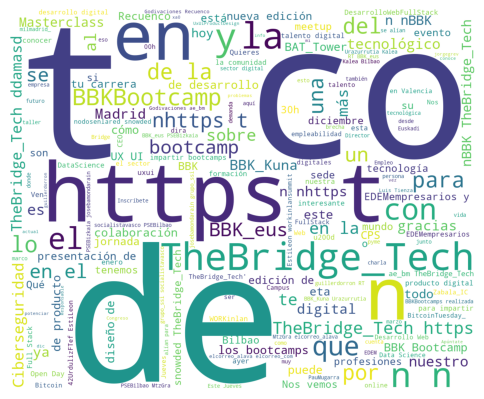

In [51]:
plt.subplots(figsize=(6,6))
wordcloud = WordCloud(background_color='white',width=1200,height=980).generate(str(df_unido["text"].values))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()